In [98]:
import matplotlib.cm
viridis = matplotlib.cm.get_cmap('viridis')

def srgb_component_to_linear(c):
    if c < 0.03928:
        return c / 12.92
    else:
        return ((c+0.055)/1.055) ** 2.4

def srgb_to_linear(rgb):
    return [srgb_component_to_linear(c) for c in rgb]

def luminance(rgb):
    rgb = srgb_to_linear(rgb)
    return 0.2126 * rgb[0] + 0.7152 * rgb[1] + 0.0722 * rgb[2]

def contrast(rgb1, rgb2):
    return (luminance(rgb1) + 0.05) / (luminance(rgb2) + 0.05)

text_color = [float(0x22)/0xFF, float(0x22)/0xFF, float(0x22)/0xFF]

def contrast_vs_text(rgb):
    return contrast(rgb, text_color)

def dist(rgb1, rgb2):
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rbar = (r1 + r2) / 2.0
    dR = r1 - r2
    dG = g1 - g2
    dB = b1 - b2
    return sqrt(
        2 * dR * dR +
        4 * dG * dG +
        3 * dB * dB +
        rbar * (dR*dR - dB*dB)
    ) / sqrt(9.5)

def fract(x):
    return x - floor(x)

def clamp(val, low=0, high=1):
    return max(low, min(high, val))

def triangle(x):
    return 2.0 * abs(fract(x) - 0.5) - 1.0

def lerp(a, b, t):
    return a + t * (b - a)

def colorlerp(t, c0, c1):
    return (lerp(c0[0], c1[0], t), lerp(c0[1], c1[1], t), lerp(c0[2], c1[2], t))

def hcl2rgb(hcl):
    H, C, L = hcl
    hPrime = (360.0 * H) / 60.0
    X = C * (1.0 - abs(hPrime - 2 * floor(hPrime / 2) - 1.0))
    if hPrime < 1.0: 
        R, G, B = (C, X, 0)
    elif hPrime < 2.0: 
        R, G, B = (X, C, 0)
    elif hPrime < 3.0: 
        R, G, B = (0, C, X)
    elif hPrime < 4.0: 
        R, G, B = (0, X, C)
    elif hPrime < 5.0: 
        R, G, B = (X, 0, C)
    else:
        R, G, B = (C, 0, X)
    m = L - (0.3 * R + 0.59 * G + 0.11 * B)
    return vector((clamp(R + m), clamp(G + m), clamp(B + m)))

def plotfn(color):
    polygons = Graphics()
    band_count = 100
    delta_t = 1 / float(band_count)
    
    colormap = matplotlib.colors.ListedColormap([color(float(t + 0.5) / band_count) for t in xrange(band_count)])
    show(density_plot(lambda x, y: x, (0, 1), (0, 1), cmap=colormap, plot_points=band_count) +
        plot(lambda t: dist(color(t-delta_t/2), color(t+delta_t/2))/15 / delta_t, (delta_t/2,1.0 - delta_t/2), ymin=0, ymax=1.0, color='#EB5757') +
        plot(lambda t: (contrast_vs_text(color(t))-1)/21, (0,1.0), xmin=0, ymin=0, ymax=1, color=text_color) +
        plot(lambda t: (4.5-1)/21, (0,1.0), xmin=0, ymin=0, ymax=1, linestyle="dotted", color=text_color),
        aspect_ratio=2.0/7.0)
    
    def colordiff(t0, t1):
        return dist(color(t0), color(t1))
    
    show(density_plot(lambda t0, t1: colordiff(t0, t1), (0, 1), (0, 1), cmap=viridis, plot_points=band_count))

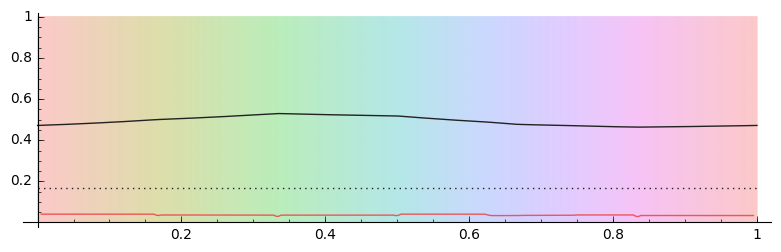

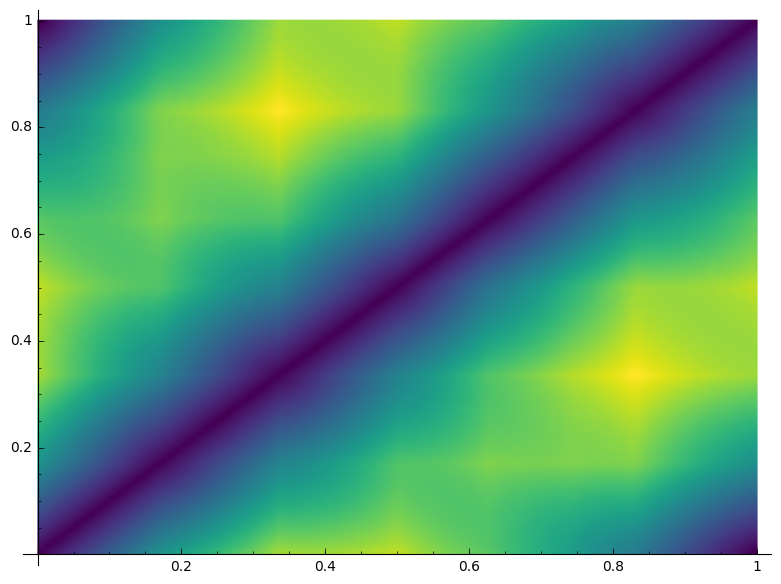

In [99]:
plotfn(lambda t: hcl2rgb([t, 0.2, 0.85]))

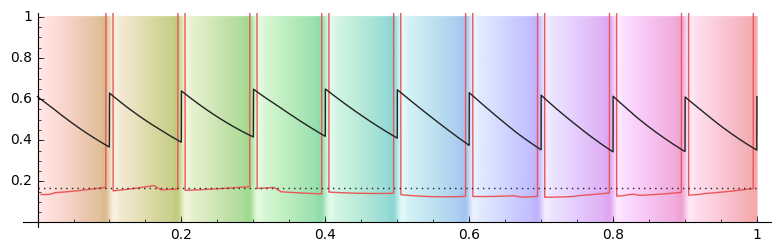

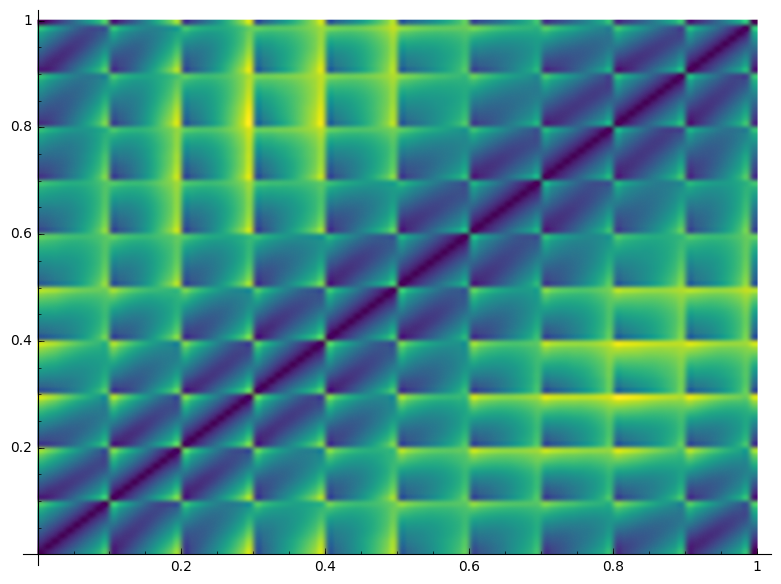

In [100]:
def hclalt(t):
    x = 2.0 * fract(10.0 * t) - 1.0
    return hcl2rgb([
        t,
        0.2 + 0.1 * x,
        0.85 - 0.1 * x
    ])

plotfn(hclalt)

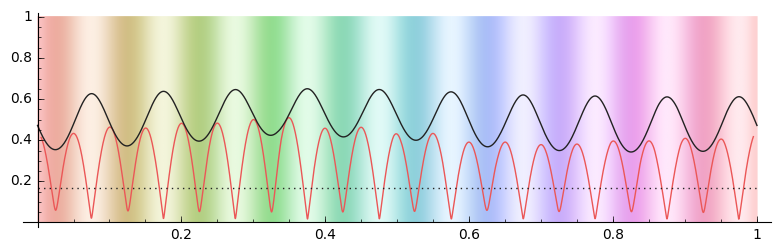

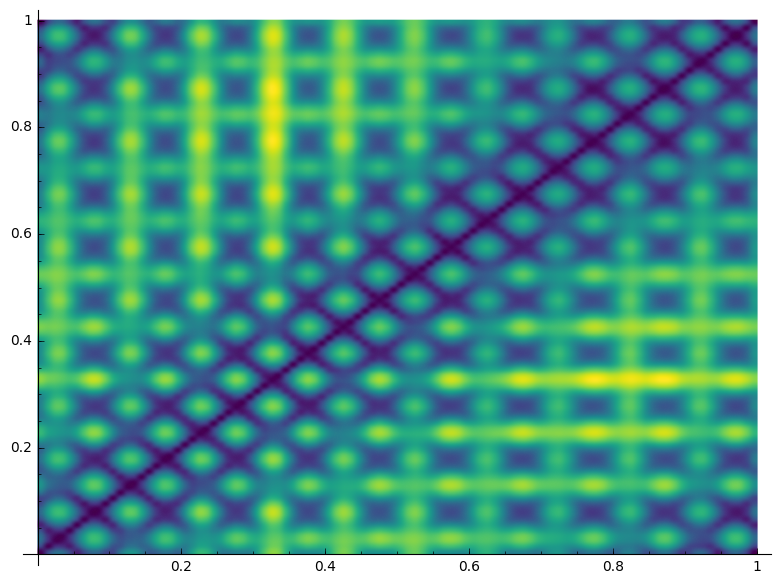

In [101]:
def hclalt(t):
    x = 2.0 * (1.0 + sin(10.0 * 2 * 3.141596 * t)) / 2.0 - 1.0
    return hcl2rgb([
        t,
        0.2 + 0.1 * x,
        0.85 - 0.1 * x
    ])

plotfn(hclalt)

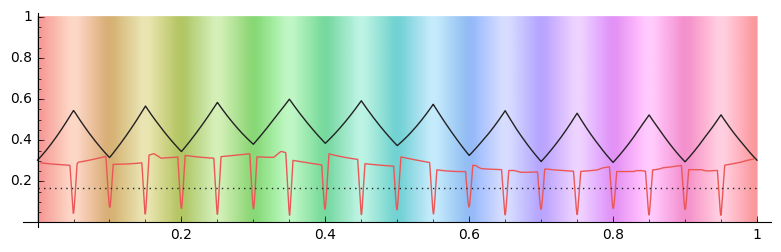

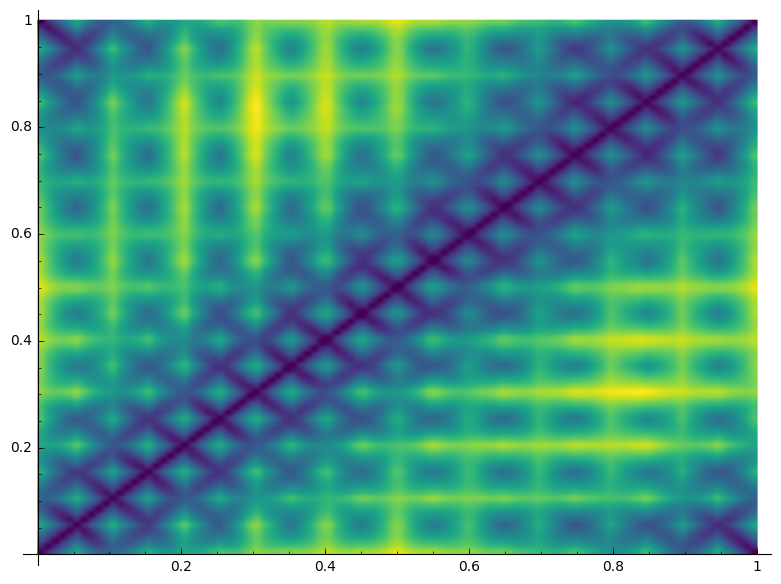

In [102]:
def hclalt2(t):
    x = (1.0 + triangle(10.0 * t)) / 2.0
    return hcl2rgb([
        t,
        0.2 + 0.4 * x,
        0.90 - 0.4 * x
    ])

plotfn(hclalt2)

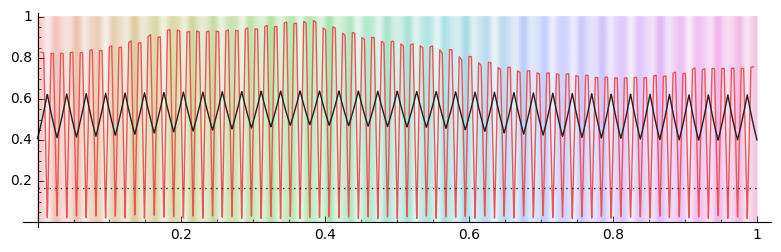

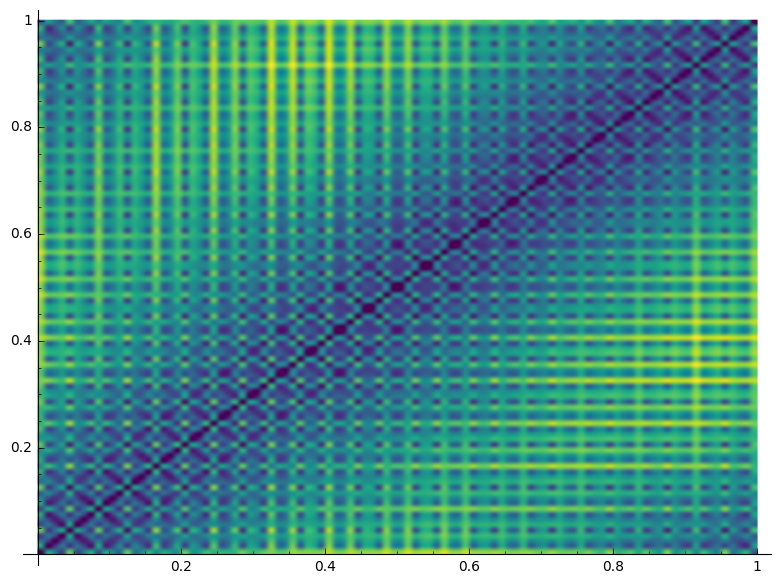

In [103]:
def hclalt3(t):
    x = triangle(37.0 * t)
    return hcl2rgb([
        0.9 * t,
        0.25 + 0.2 * x,
        0.80 - 0.15 * x
    ])

plotfn(hclalt3)

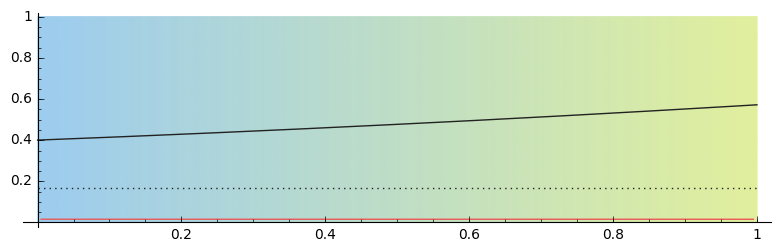

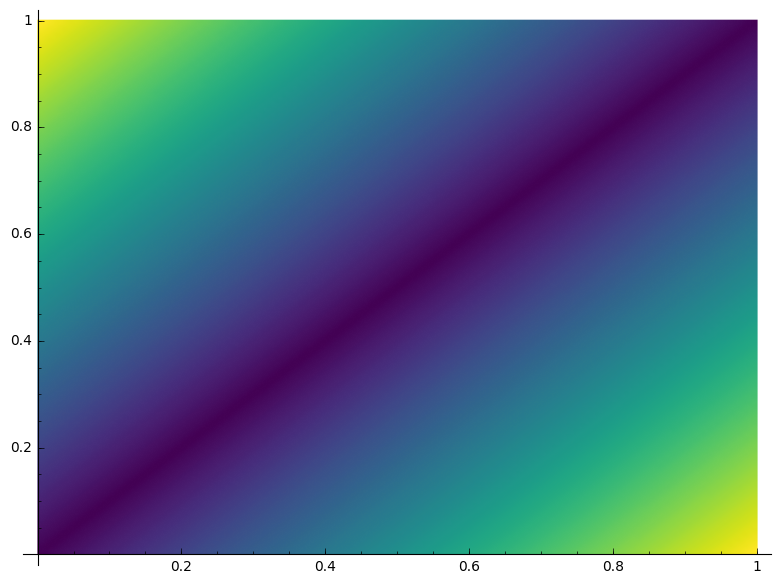

In [104]:
color1 = (0x9D / 0xFF, 0xCD / 0xFF, 0xF0 / 0xFF)
color2 = (0xE2 / 0xFF, 0xF0 / 0xFF, 0x9D / 0xFF)

def lineargrad1(t):
    return colorlerp(t, color1, color2)

plotfn(lineargrad1)

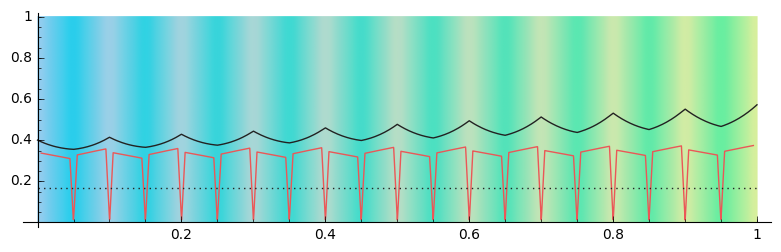

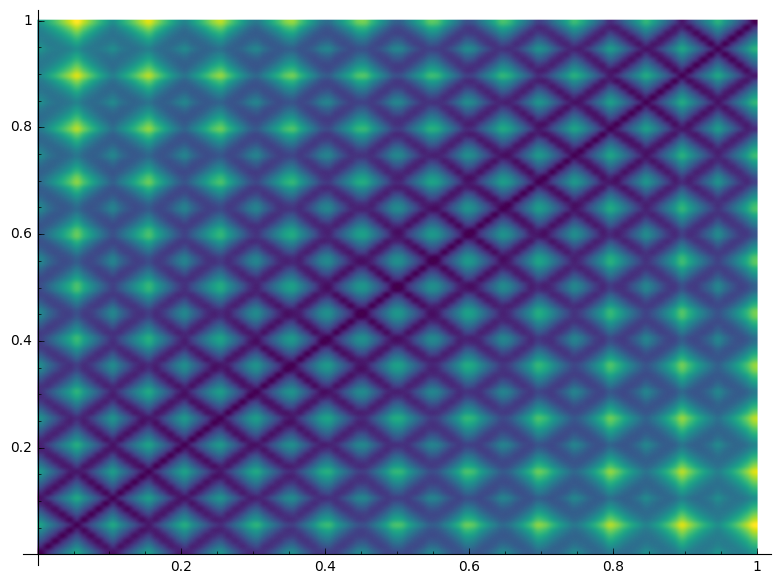

In [105]:
color1 = (0x9D / 0xFF, 0xCD / 0xFF, 0xF0 / 0xFF)
color2 = (0xE2 / 0xFF, 0xF0 / 0xFF, 0x9D / 0xFF)

def lineargrad2(t):
    return vector(colorlerp(t, color1, color2)) + vector((
        0.5 * triangle(10.0 * t),
        0, 0
    ))

plotfn(lineargrad2)